## Importar libreria

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import empiricaldist
import ssl
import urllib.request

# Desactivar verificación de certificados SSL
ssl._create_default_https_context = ssl._create_unverified_context

## Importar base de datos

In [2]:
df = sns.load_dataset('penguins')

In [3]:
p_df = (
    df
    .dropna()
    .copy()
)

In [4]:
p_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## Visualizar distribuciones

### Función de densidad de probabilidad

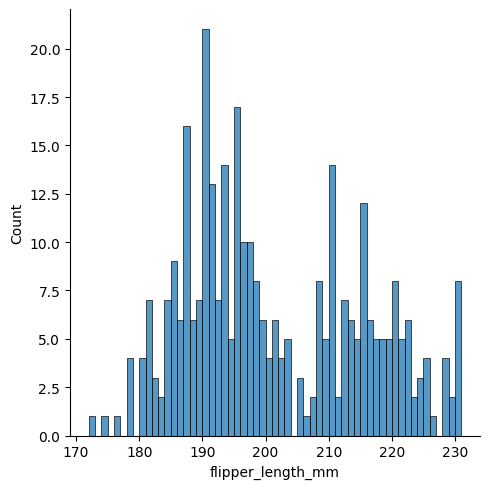

In [5]:
# seaborn
sns.displot(
    data=p_df,
    x='flipper_length_mm',
    kind='hist',
    binwidth=1
)

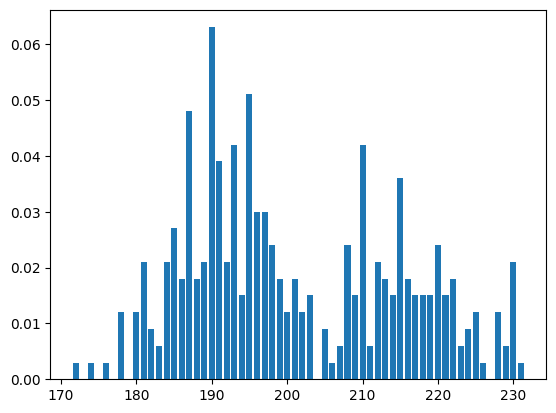

In [8]:
## Empirical dist

pmf_flipper = empiricaldist.Pmf.from_seq(
    p_df.flipper_length_mm,
    normalize=True
    )
pmf_flipper.bar()

In [11]:
## Probablidad de que una obervación tenga la caracteristica

pmf_flipper(200)

np.float64(0.012012012012012012)

### Función de densidad acumulada empiricas

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

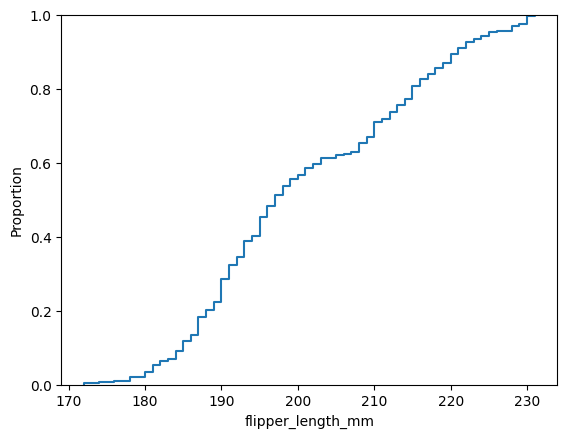

In [12]:
## seabon

sns.ecdfplot(
    data=p_df,
    x='flipper_length_mm'
)

In [15]:
## empiricaldist

cdf_flipper = empiricaldist.Cdf.from_seq(
    p_df.flipper_length_mm,
    normalize=True
)

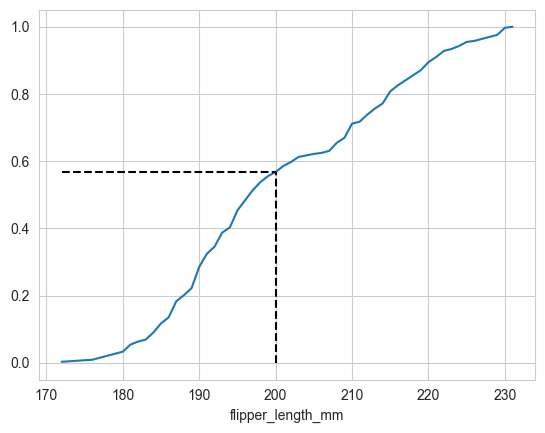

In [38]:
q  =200
p = cdf_flipper.forward(200)

sns.set_style('whitegrid')

cdf_flipper.plot()

plt.vlines (
    x = q,
    ymin = 0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines (
    y = p,
    xmin = p_df.flipper_length_mm.min(),
    xmax=q,
    color='black',
    linestyle='dashed'
)

In [22]:
cdf_flipper(200)

array(0.56756757)

## Comparar distribuciones

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

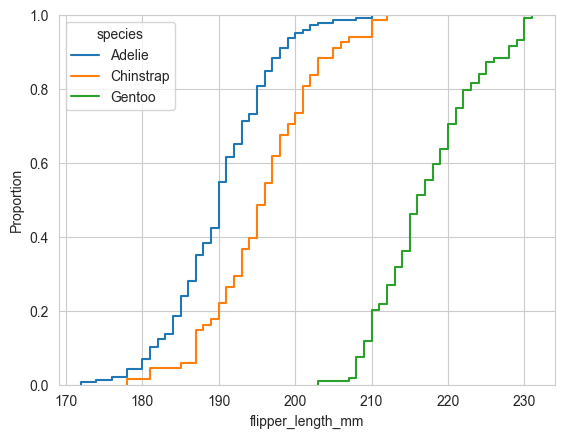

In [40]:
sns.ecdfplot(
    data=p_df,
    x='flipper_length_mm',
    hue='species'
)